In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Helper functions

def do_pca(df):
    # Standard Scaler
    ss = StandardScaler()
    set1_ss = ss.fit_transform(df)

    # PCA
    pca = PCA(random_state = 32)
    pc = pca.fit_transform(set1_ss)

    # Convert to DataFrame for plotting
    pc_df = pd.DataFrame(data=pc, 
                         columns=[f'PC{i+1}' for i in range(len(df.columns))],
                         index = df.index)

    # Print out the explained variance ratio of the first 3 PCs
    # It represents how much of the variance that each PC explains
    var_exp = pca.explained_variance_ratio_
    print(f'Explained variance (first 3 components): {np.round(var_exp[:3],3)}')

    # Print out the accumulating explained variance ratio of the first 3 PCs
    # It represents how much of the variance in total that the first 3 PCs explain
    cum_var_exp = np.cumsum(var_exp)
    print(f'Cumulative explained variance (first 3 components): {np.round(cum_var_exp[:3],3)}')

    # return the DataFrame for plotting
    return pc_df

def arrange_data(cluster):
    # Separate the cluster data into two different dictionaries for manipulation
    dict = {}
    for i in range(0, len(cluster)):
        data = [x for x in cluster.iloc[i].to_list() if str(x) != 'nan']
        dict[f'cluster{i+1}'] = data

    sets = {}
    for counter, c in enumerate(dict, 1):
        data = ccy[dict[c]]
        sets[f'set{counter}'] = data

    return dict, sets

In [2]:
# read data
clusters = pd.read_csv('../data/return_clusters.csv')

ccy = pd.read_csv('../data/ccy1996_to_2023(c).csv')
ccy = ccy[313:]
ccy.set_index('Date', inplace=True)

In [3]:

dict_clusters, sets = arrange_data(clusters)

# Perform PCA on each set of data
# save the respective PC in the list for later

list_pc = []
for s in sets:
    print(f'PCA for {s}')
    pca = do_pca(sets[s])
    list_pc.append(pca)
    print(' ')

PCA for set1
Explained variance (first 3 components): [0.477 0.319 0.129]
Cumulative explained variance (first 3 components): [0.477 0.796 0.924]
 
PCA for set2
Explained variance (first 3 components): [0.499 0.278 0.188]
Cumulative explained variance (first 3 components): [0.499 0.777 0.965]
 
PCA for set3
Explained variance (first 3 components): [0.492 0.241 0.173]
Cumulative explained variance (first 3 components): [0.492 0.733 0.906]
 
PCA for set4
Explained variance (first 3 components): [0.863 0.096 0.023]
Cumulative explained variance (first 3 components): [0.863 0.959 0.982]
 
PCA for set5
Explained variance (first 3 components): [0.785 0.181 0.034]
Cumulative explained variance (first 3 components): [0.785 0.966 1.   ]
 


From the above, it looks like in general the first two principal components are able to explain at least 65% of the variance.  
Therefore, we would attempt to plot the equally weighted PC of the first two PCs.  
Then we will match such plot with some of the other macro factors out there.

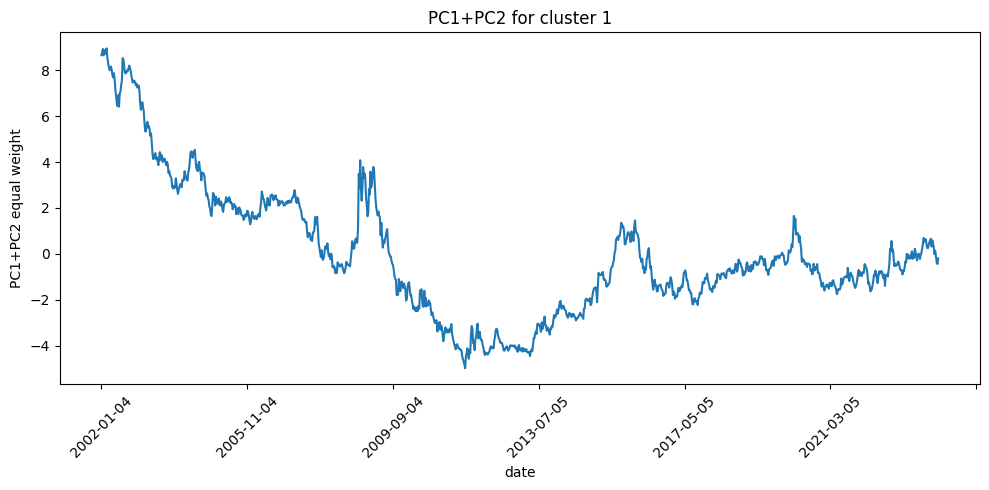

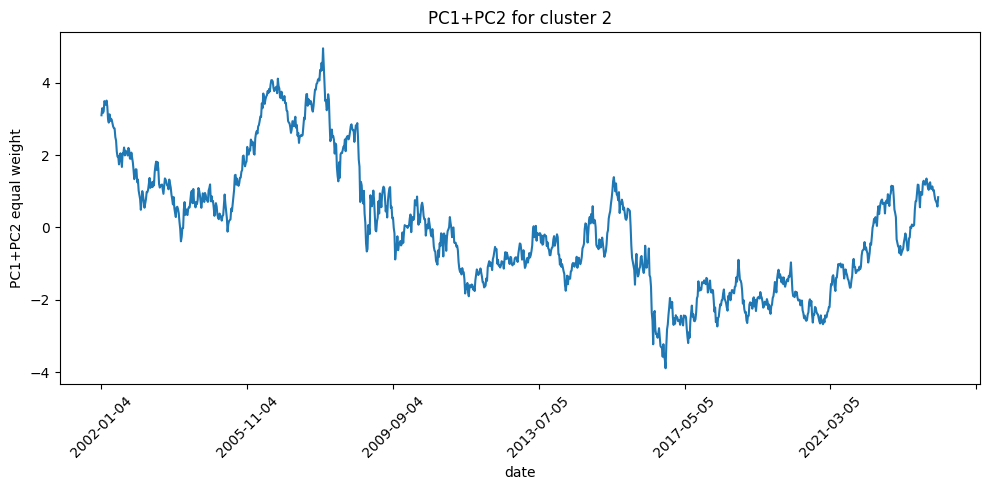

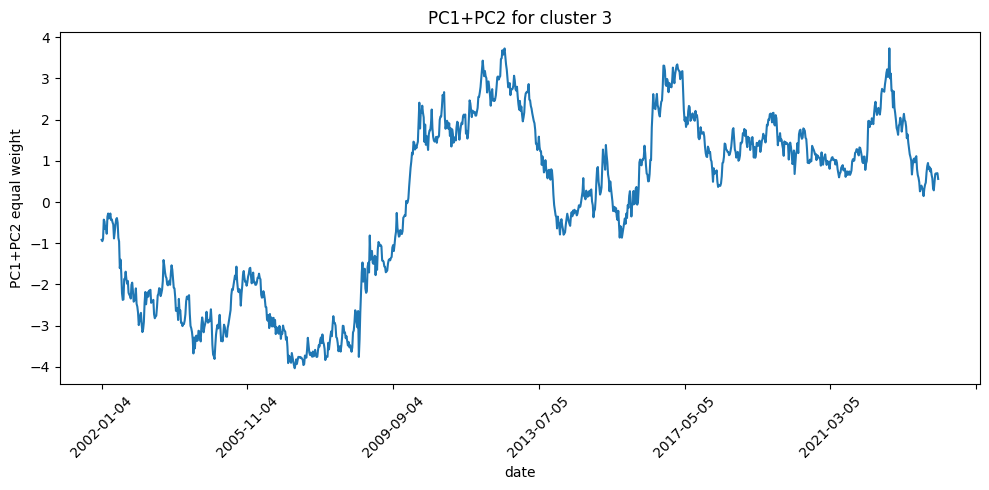

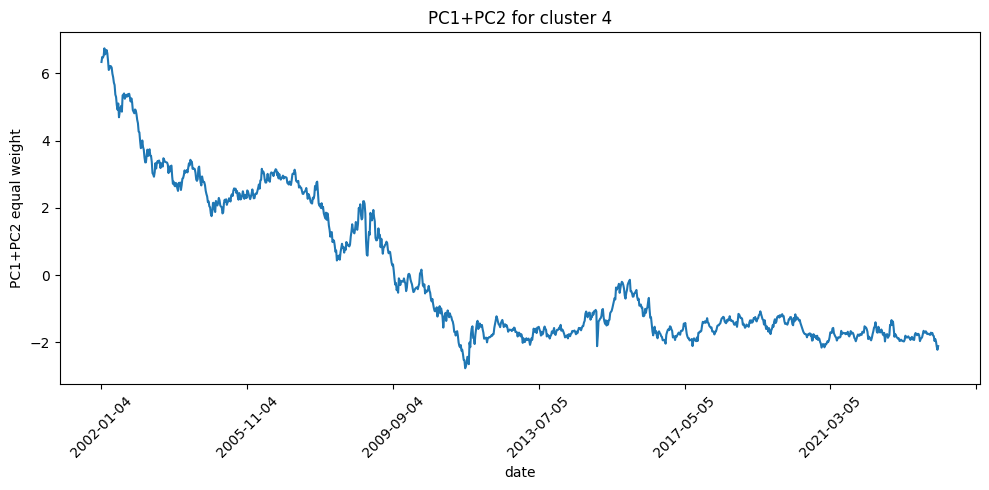

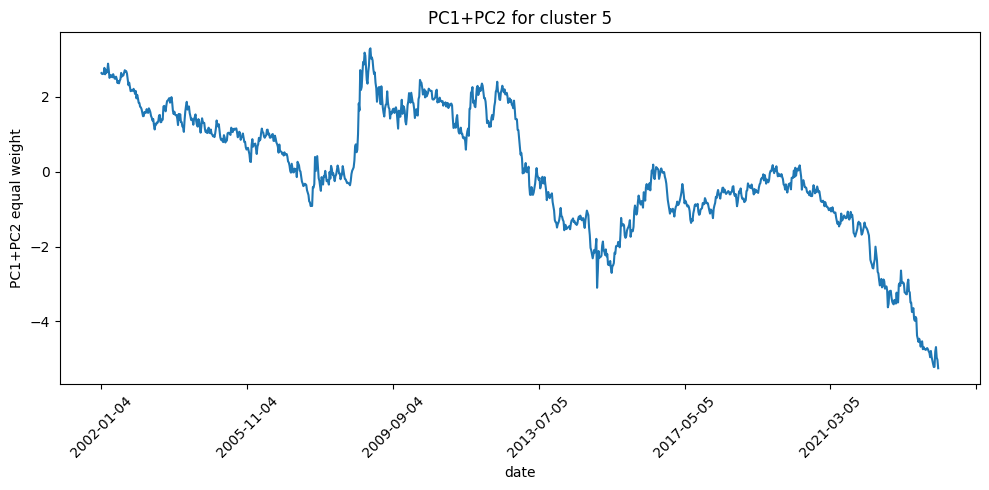

In [4]:
# Calculate the equally-weighted PC for the first two PCs
# Plot out this PC
# Save the respective PCs in different DataFrame for future use
pc_df = {}
for counter, pc in enumerate(list_pc):
    df = pd.DataFrame(data=pc,
                      columns=['PC1','PC2'],
                      index=pc.index)
    pc_df[f'cluster{counter+1}'] = df
    # df['Equal_weighted_PC'] = df.mean(axis=1)
    df['Combined_PC'] = df.sum(axis=1)
    plt.figure(figsize=(10,5))
    # df['Equal_weighted_PC'].plot()
    df['Combined_PC'].plot()
    plt.xlabel('date')
    plt.ylabel('PC1+PC2 equal weight')
    plt.title(f'PC1+PC2 for cluster {counter+1}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [5]:
for i in dict_clusters:
    print(f'{i}: {dict_clusters[i]}')

cluster1: ['USDAUD', 'USDNZD', 'USDEUR', 'USDCAD', 'AUDNZD', 'GBPAUD', 'AUDCHF', 'EURNZD', 'NZDCHF', 'GBPCAD']
cluster2: ['NZDCAD', 'EURGBP', 'EURJPY', 'CADJPY']
cluster3: ['USDGBP', 'USDJPY', 'EURAUD', 'AUDCAD', 'EURCAD', 'GBPJPY']
cluster4: ['USDCHF', 'GBPNZD', 'EURCHF', 'GBPCHF', 'CADCHF']
cluster5: ['AUDJPY', 'NZDJPY', 'CHFJPY']
